In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv("C:\\Users\\91636\\OneDrive\\Desktop\\Regex ML\\Data\\titanic.csv", usecols = ['Age','Fare','Survived'])

In [3]:
df

,Survived,Age,Fare
0,0,34.5,7.8292
1,1,47.0,7.0000
2,0,62.0,9.6875
3,0,27.0,8.6625
4,1,22.0,12.2875
...,...,...,...
413,0,NaN,8.0500
414,1,39.0,108.9000
415,0,38.5,7.2500
416,0,NaN,8.0500


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer

In [5]:
df.dropna(inplace = True)
df

,Survived,Age,Fare
0,0,34.5,7.8292
1,1,47.0,7.0000
2,0,62.0,9.6875
3,0,27.0,8.6625
4,1,22.0,12.2875
...,...,...,...
409,1,3.0,13.7750
411,1,37.0,90.0000
412,1,28.0,7.7750
414,1,39.0,108.9000


In [6]:
df.shape

(331, 3)

In [7]:
x = df.iloc[:,1:]
y = df.iloc[:,0]

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [9]:
x_train.head()

,Age,Fare
78,30.0,13.0000
56,35.0,7.8958
0,34.5,7.8292
321,25.0,7.2292
350,45.0,63.3583


In [10]:
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)

DecisionTreeClassifier()

In [11]:
y_pred = clf.predict(x_test)

In [12]:
accuracy_score(y_test, y_pred)

0.6567164179104478

In [13]:
np.mean(cross_val_score(DecisionTreeClassifier(), x, y, cv = 10, scoring = "accuracy"))

0.5711229946524063

In [14]:
kbin_age = KBinsDiscretizer(n_bins = 15, encode = 'ordinal', strategy = 'quantile')

In [16]:
kbin_fare=KBinsDiscretizer(n_bins = 15, encode = 'ordinal', strategy = 'quantile')

In [17]:
trf = ColumnTransformer([
      ('first', kbin_age, [0]),
      ('second', kbin_fare, [1])
])

In [18]:
trf

ColumnTransformer(transformers=[('first',
                                 KBinsDiscretizer(encode='ordinal', n_bins=15),
                                 [0]),
                                ('second',
                                 KBinsDiscretizer(encode='ordinal', n_bins=15),
                                 [1])])

In [20]:
x_train_trf = trf.fit_transform(x_train)

In [21]:
x_test_trf = trf.transform(x_test)

In [22]:
trf.named_transformers_['first'].bin_edges_

array([array([ 0.17      , 12.53333333, 18.        , 21.        , 22.        ,
              24.        , 25.        , 27.        , 29.        , 30.        ,
              35.        , 38.        , 42.4       , 47.93333333, 55.        ,
              76.        ])                                                   ],
      dtype=object)

In [23]:
output=pd.DataFrame({
    'age':x_train['Age'],
    'age_trf':x_train_trf[:,0],
    'Fare': x_train['Fare'],
    'Fare_trf':x_train_trf[:,1]
})

In [24]:
output

,age,age_trf,Fare,Fare_trf
78,30.0,9.0,13.0000,6.0
56,35.0,10.0,7.8958,3.0
0,34.5,9.0,7.8292,2.0
321,25.0,6.0,7.2292,0.0
350,45.0,12.0,63.3583,12.0
...,...,...,...,...
122,35.0,10.0,57.7500,12.0
378,55.0,14.0,50.0000,11.0
60,17.0,1.0,7.8958,3.0
335,30.0,9.0,26.0000,9.0


In [25]:
output['age_labels'] = pd.cut(x = x_train['Age'], bins = trf.named_transformers_['first'].bin_edges_[0].tolist())
output['fare_labels'] = pd.cut(x = x_train['Fare'], bins = trf.named_transformers_['second'].bin_edges_[0].tolist())

In [27]:
output.sample(5)

,age,age_trf,Fare,Fare_trf,age_labels,fare_labels
330,48.0,13.0,36.7500,11.0,"(47.933, 55.0]","(31.655, 50.592]"
320,26.0,6.0,7.7750,1.0,"(25.0, 27.0]","(7.64, 7.776]"
37,21.0,3.0,8.6625,4.0,"(18.0, 21.0]","(7.896, 8.662]"
103,26.0,6.0,7.7750,1.0,"(25.0, 27.0]","(7.64, 7.776]"
407,50.0,13.0,211.5000,14.0,"(47.933, 55.0]","(136.168, 512.329]"


In [29]:
clf = DecisionTreeClassifier()
clf.fit(x_train_trf,y_train)

DecisionTreeClassifier()

In [31]:
y_pred2 = clf.predict(x_test_trf)

In [32]:
accuracy_score(y_test, y_pred2)

0.5522388059701493

In [33]:
def discretize(bins,strategy):
    kbin_age = KBinsDiscretizer(n_bins = bins, encode = 'ordinal', strategy = strategy)
    kbin_fare = KBinsDiscretizer(n_bins = bins, encode = 'ordinal', strategy = strategy)
    
    trf = ColumnTransformer([
        ('first', kbin_age, [0]),
        ('second', kbin_fare, [1])
    ])
    x_trf = trf.fit_transform(x)
    print(np.mean(cross_val_score(DecisionTreeClassifier(), x, y, scoring = 'accuracy')))
    
    plt.figure(figsize = (14,4))
    plt.subplot(121)
    plt.hist(x['Age'])
    plt.title("Age Before")
    
    plt.subplot(122)
    plt.hist(x_trf[:,0], color = 'red')
    plt.title('Age After')
    
    plt.show()
    
    plt.figure(figsize = (14,4))
    plt.subplot(121)
    plt.hist(x['Fare'])
    plt.title("Fare Before")
    
    plt.subplot(122)
    plt.hist(x_trf[:,1], color = 'red')
    plt.title('Fare After')
    
    plt.show()
    

C:\Users\91636\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\91636\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


0.5741745816372681


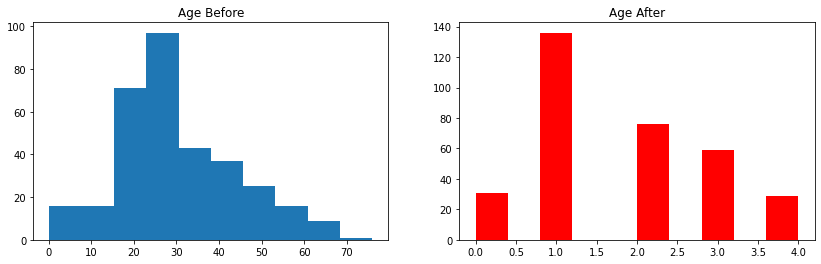

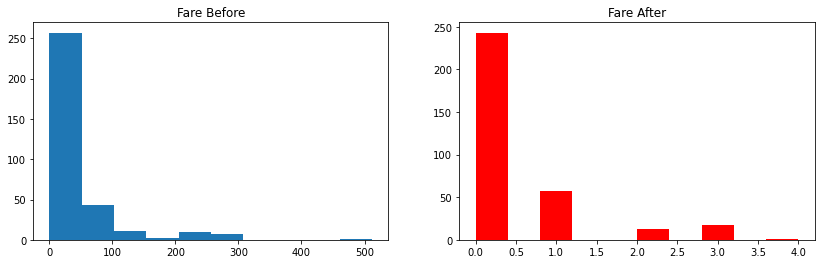

In [34]:
discretize(5,'kmeans')